<img src='./regression.png'>

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [2]:
df = pd.read_csv("./weight-height.csv")
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


# Input data 

In [4]:
x = df[['Height']].values
x

array([[73.84701702],
       [68.78190405],
       [74.11010539],
       ...,
       [63.86799221],
       [69.03424313],
       [61.94424588]])

# output Label

In [6]:
y = df[['Weight']].values
y

array([[241.89356318],
       [162.31047252],
       [212.74085556],
       ...,
       [128.47531878],
       [163.85246135],
       [113.64910268]])

# Line Algo

In [30]:
def line(x, w=1, b=0):
    return w * x + b


# Loss calculation function

In [31]:
def mean_squared_error(y_true, y_pred):
    s = (y_true - y_pred) ** 2
    return np.sqrt(s.mean())

In [32]:
# input
x1 = np.arange(1,12)
x1

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [33]:
# actual output human annoted labels
y1 = np.array([1,8,4,20,15,25,5,6,8,21,22])
y1

array([ 1,  8,  4, 20, 15, 25,  5,  6,  8, 21, 22])

In [34]:
print(len(x1), len(y1))

11 11


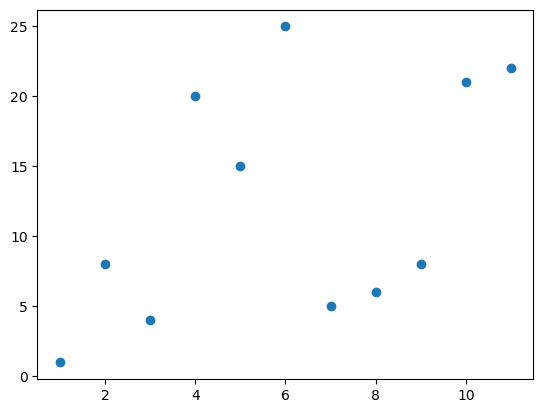

In [35]:
plt.scatter(x1,y1)

In [46]:
# predict with machine
y_predict1 = line(x1)
y_predict2 = line(x1,w=2,b=0.2)# training find w and b best values
y_predict3 = line(x1,w=2.5,b=0.2)

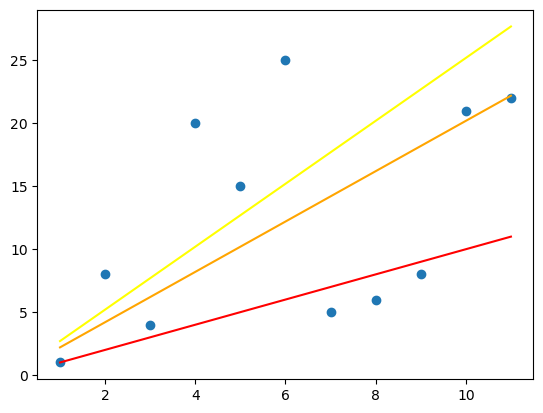

In [47]:
plt.scatter(x1,y1)
plt.plot(x1,y_predict1, color='red')
plt.plot(x1,y_predict2, color='orange')
plt.plot(x1,y_predict3, color='yellow')



In [48]:
print("red line",mean_squared_error(y1, y_predict1))
print("orange line",mean_squared_error(y1, y_predict2))
print("yellow line",mean_squared_error(y1, y_predict3))

red line 9.558432735738446
orange line 7.629130773793064
yellow line 8.795350011124164


# now working on actual height and weight dataset

In [49]:
print(len(df))

10000


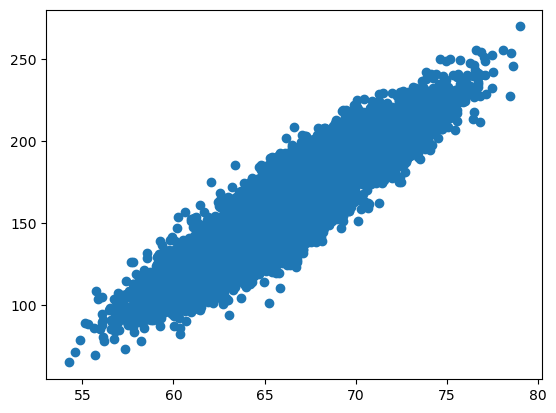

In [50]:
plt.scatter(x,y)

Text(0.5, 0, 'b')

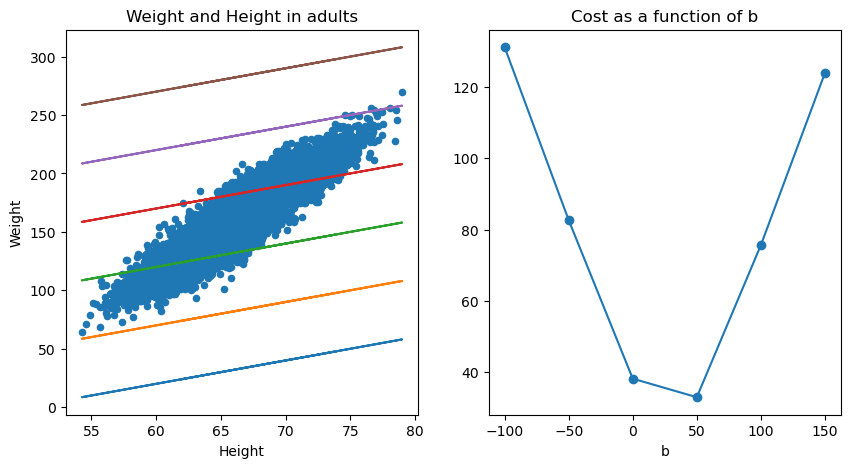

In [55]:
plt.figure(figsize=(10,5))
ax1 =plt.subplot(121)
df.plot(kind='scatter',
       x="Height",
       y="Weight",
       title="Weight and Height in adults",
       ax=ax1)

bs = np.array([-100,-50,0,50,100,150])
mses = []

for b1 in bs:
    y_pred = line(x, w=2, b=b1)
    mse = mean_squared_error(y, y_pred)
    mses.append(mse)
    plt.plot(x, y_pred)

ax2 = plt.subplot(122)
plt.plot(bs,mses, 'o-')
plt.title("Cost as a function of b")
plt.xlabel("b")

In [56]:
np.argmin(mses)

3

In [57]:
mses[3]

32.96359686320369

In [58]:
mses

[131.1417931672291,
 82.62957208407575,
 38.172273320810234,
 32.96359686320369,
 75.60472859445356,
 123.87716195296917]

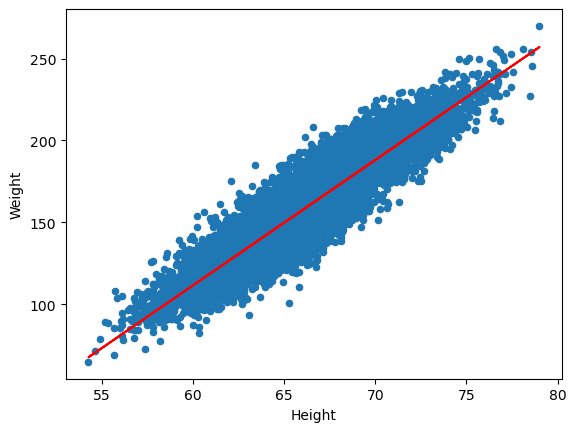

In [65]:
df.plot(kind='scatter',
       x="Height",
       y="Weight")
pred = line(x,w=7.6609697, b=-348.1694)
plt.plot(x,pred,color='red')

In [66]:
mean_squared_error(y,pred)

12.276362654173662

In [73]:
user_input = np.array([[90]])

user_pred = line(user_input,w=7.6609697, b=-348.1694) #ML model
user_pred

array([[341.317873]])

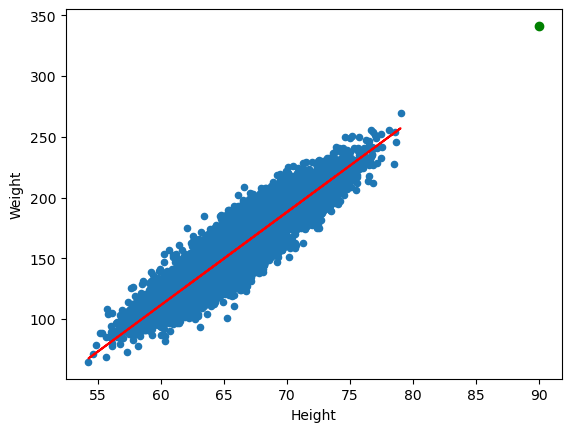

In [74]:
df.plot(kind='scatter',
       x="Height",
       y="Weight")
pred = line(x,w=7.6609697, b=-348.1694)
plt.plot(x,pred, color='red')
plt.scatter(user_input,user_pred, color='green')